In [1]:
import os,glob
import numpy as np
import matplotlib.pyplot as plt
import time


import matplotlib.animation as animation

In [2]:
files_z =glob.glob("3D_eden_cpp/standard_data/prof_Z*.txt")
nums = [int(files_z[i].split("Z")[1].split("_")[0]) for i in range(len(files_z))]
files_z = np.array(files_z)[np.argsort(nums)]
xsize,ysize,zsize=102,102,100

In [17]:
arr

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  5, 27, ..., 53, 20,  0],
       [ 0, 28,  0, ...,  0,  0,  0],
       ...,
       [ 0,  5,  0, ...,  0,  0,  0],
       [ 0,  0, 43, ...,  0, 54,  0],
       [ 0,  0, 33, ...,  0,  0,  0]])

In [16]:
zhists =np.zeros((len(files_z),xsize,ysize))
for i,f in enumerate(files_z):
    print(str(i) +" of "+ str(len(files_z)))
    arr =np.loadtxt(f,delimiter=", ").astype(int)
    arr =arr[:,2].reshape((xsize,ysize))
    zhists[i]=arr

0 of 25
1 of 25
2 of 25
3 of 25
4 of 25
5 of 25
6 of 25
7 of 25
8 of 25
9 of 25
10 of 25
11 of 25
12 of 25
13 of 25
14 of 25
15 of 25
16 of 25
17 of 25
18 of 25
19 of 25
20 of 25
21 of 25
22 of 25
23 of 25
24 of 25


<Figure size 432x288 with 0 Axes>

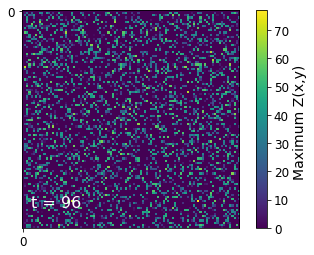

In [8]:
plt.clf()
fig,ax =plt.subplots()
init_rad=200

t_space=np.linspace(0,100,26).astype(int)

#im=ax.imshow(np.full((xsize,ysize),.1),vmin=.1,vmax=np.max(np.log(zhists) ))
#im=ax.imshow(np.zeros((int(1.1*init_rad),int(1.1*init_rad))),vmin=0,vmax = np.max(zhists))
#ax.axis('off')
ax.set_xticks([0,xsize])
ax.set_yticks([0,xsize])
ax.tick_params(axis='both', which='major', labelsize=12)
im=ax.imshow(np.zeros((xsize,ysize)),vmin=0,vmax=np.max(zhists))

#im=ax.imshow(np.log(zhists[-1]),vmin=.1,vmax=np.max(np.log(zhists) ))


ims = []
for add in range(len(files_z)):
    
    #ims.append((ax.imshow(np.log(zhists[add]),vmin=.1,vmax=np.max(np.log(zhists))),))
    #x.axis('off')
    #ax.set_xticks([0,xsize])
    ims.append((ax.imshow(zhists[add],vmin=0,vmax=np.max(zhists)),
                ax.text(.04*xsize,.9*ysize,"t = " +str(t_space[add]),fontsize=16,color='w')))

    #ims.append((ax.imshow(zhists[add,(int(xsize/2)-int(1.1*init_rad/2)):(int(xsize/2)+int(1.1*init_rad/2)),(int(ysize/2)-int(1.1*init_rad/2)):(int(ysize/2)+int(1.1*init_rad/2)) ],vmin=0,vmax=np.max(zhists)),))


im_ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=3000,
                                   blit=True)
                 
cbar= fig.colorbar(im)
cbar.ax.tick_params(axis='both', which='major', labelsize=12)
cbar.ax.set_ylabel('Maximum Z(x,y) ',fontsize=14)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})
#timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
timestr = files_z[0].split("prof_Z")[1].split("_")[1].split(".")[0]
im_ani.save('gifs/im_standard_' +timestr+'.gif',writer='imagemagick')



<Figure size 432x288 with 0 Axes>

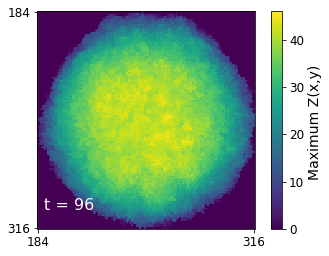

In [186]:
plt.clf()
fig,ax =plt.subplots()
init_rad=120

t_space=np.linspace(0,100,26).astype(int)
#im=ax.imshow(np.full((xsize,ysize),.1),vmin=.1,vmax=np.max(np.log(zhists) ))
#im=ax.imshow(np.zeros((int(1.1*init_rad),int(1.1*init_rad))),vmin=0,vmax = np.max(zhists))
#ax.axis('off')
ax.set_xticks([0,int(1.1*init_rad)-1])
ax.set_yticks([0,int(1.1*init_rad)-1])
ax.set_xticklabels([(int(xsize/2)-int(1.1*init_rad/2)),(int(xsize/2)+int(1.1*init_rad/2))])
ax.set_yticklabels([(int(ysize/2)-int(1.1*init_rad/2)),(int(ysize/2)+int(1.1*init_rad/2))])
ax.tick_params(axis='both', which='major', labelsize=12)
im=ax.imshow(np.zeros((int(1.1*init_rad),int(1.1*init_rad))),vmin=0,vmax = np.max(zhists))
#im=ax.imshow(np.zeros((xsize,ysize)),vmin=0,vmax=np.max(zhists))

#im=ax.imshow(np.log(zhists[-1]),vmin=.1,vmax=np.max(np.log(zhists) ))


ims = []
for add in range(len(files_z)):
    
    #ims.append((ax.imshow(np.log(zhists[add]),vmin=.1,vmax=np.max(np.log(zhists))),))
    #x.axis('off')
    #ax.set_xticks([0,xsize])
    #ims.append((ax.imshow(zhists[add],vmin=0,vmax=np.max(zhists)),
    #            ax.text(20,475,"t = " +str(t_space[add]),fontsize=16,color='w')))

    ims.append((ax.imshow(zhists[add,(int(xsize/2)-int(1.1*init_rad/2)):(int(xsize/2)+int(1.1*init_rad/2)),(int(ysize/2)-int(1.1*init_rad/2)):(int(ysize/2)+int(1.1*init_rad/2)) ],vmin=0,vmax=np.max(zhists)),
                ax.text(.03*init_rad,init_rad,"t = " +str(t_space[add]),fontsize=16,color='w')))


im_ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=3000,
                                   blit=True)
                 
cbar= fig.colorbar(im)
cbar.ax.tick_params(axis='both', which='major', labelsize=12)
cbar.ax.set_ylabel('Maximum Z(x,y) ',fontsize=14)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})
#timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
timestr = files_z[0].split("prof_T")[1].split("_")[1].split(".")[0]
im_ani.save('gifs/im_standard_' +timestr+'_zoom.gif',writer='imagemagick')



/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/nikhilkrishnan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


<Figure size 432x288 with 0 Axes>

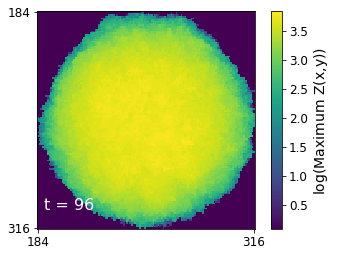

In [187]:
plt.clf()
fig,ax =plt.subplots()
init_rad=120

t_space=np.linspace(0,100,26).astype(int)

#im=ax.imshow(np.zeros((int(1.1*init_rad),int(1.1*init_rad))),vmin=0,vmax = np.max(zhists))
#ax.axis('off')
ax.set_xticks([0,int(1.1*init_rad)-1])
ax.set_yticks([0,int(1.1*init_rad)-1])
ax.set_xticklabels([(int(xsize/2)-int(1.1*init_rad/2)),(int(xsize/2)+int(1.1*init_rad/2))])
ax.set_yticklabels([(int(ysize/2)-int(1.1*init_rad/2)),(int(ysize/2)+int(1.1*init_rad/2))])
ax.tick_params(axis='both', which='major', labelsize=12)
#im=ax.imshow(np.zeros((int(1.1*init_rad),int(1.1*init_rad))),vmin=0,vmax = np.max(zhists))
im=ax.imshow(np.full((int(1.1*init_rad),int(1.1*init_rad)),.1),vmin=.1,vmax=np.max(np.log(zhists) ))
#im=ax.imshow(np.zeros((xsize,ysize)),vmin=0,vmax=np.max(zhists))

#im=ax.imshow(np.log(zhists[-1]),vmin=.1,vmax=np.max(np.log(zhists) ))


ims = []
for add in range(len(files_z)):
    
    #ims.append((ax.imshow(np.log(zhists[add]),vmin=.1,vmax=np.max(np.log(zhists))),))
    #x.axis('off')
    #ax.set_xticks([0,xsize])
    #ims.append((ax.imshow(zhists[add],vmin=0,vmax=np.max(zhists)),
    #            ax.text(20,475,"t = " +str(t_space[add]),fontsize=16,color='w')))

    ims.append((ax.imshow(np.log(zhists[add,(int(xsize/2)-int(1.1*init_rad/2)):(int(xsize/2)+int(1.1*init_rad/2)),(int(ysize/2)-int(1.1*init_rad/2)):(int(ysize/2)+int(1.1*init_rad/2)) ]),vmin=.1,vmax=np.max(np.log(zhists))),
                ax.text(.03*init_rad,init_rad,"t = " +str(t_space[add]),fontsize=16,color='w')))


im_ani = animation.ArtistAnimation(fig, ims, interval=500, repeat_delay=3000,
                                   blit=True)
                 
cbar= fig.colorbar(im)
cbar.ax.tick_params(axis='both', which='major', labelsize=12)
cbar.ax.set_ylabel(r'$\log$(Maximum Z(x,y)) ',fontsize=14)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})
#timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
timestr = files_z[0].split("prof_T")[1].split("_")[1].split(".")[0]
im_ani.save('gifs/im_standard_log_' +timestr+'_zoom.gif',writer='imagemagick')



In [90]:
[(int(xsize/2)-int(1.1*init_rad/2)),(int(xsize/2)+int(1.1*init_rad/2))]

[206, 294]

In [122]:
files_t =glob.glob("3D_eden_cpp/CPD/prof_T*.txt")
nums = [int(files_t[i].split("T")[1].split("_")[0]) for i in range(len(files_t))]
files_t = np.array(files_t)[np.argsort(nums)]
xsize,ysize,zsize=20,800,100

In [ ]:
files_t

In [92]:
state=np.zeros((len(files_t),xsize,ysize,zsize))
for i,f in enumerate(files_t):
    print(str(i) +" of "+ str(len(files_t)))
    
    
    arr= np.loadtxt(f,delimiter=", ").astype(int)
    for a in arr:
        state[i,tuple(a)]=1
    print(np.sum(state[i]))

    
    

0 of 25


OSError: 3D_eden_cpp/CPD/prof_T0_2020-09-18-17-03-08.txt not found.

3D_eden_cpp/CPD/prof_T0_2020-09-18-18-13-48.txt


100000

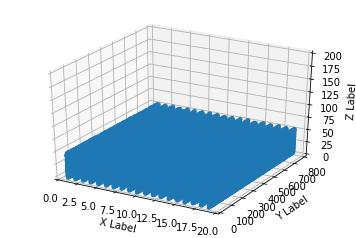

In [116]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np
f=files_t[0]
print(f)

arr= np.loadtxt(f,delimiter=", ").astype(int)



# Fixing random state for reproducibility


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

    

    
ax.scatter(xs=arr[:,0],ys=arr[:,1],zs=arr[:,2],s=10)
    
    
    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.set_xlim([0,20])
ax.set_ylim([0,802])
ax.set_zlim([0,200])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
#plt.savefig('gifs/final' + str())


3D_eden_cpp/CPD/prof_T240_2020-09-18-18-13-48.txt


79398

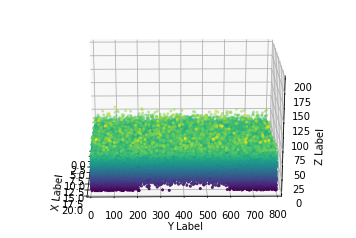

In [138]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility

f=files_t[6]
print(f)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arr= np.loadtxt(f,delimiter=", ").astype(int)

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

    

    
ax.scatter(xs=arr[:,0],ys=arr[:,1],zs=arr[:,2],s=4,c = arr[:,2])
    
    
    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(20, angle)
ax.set_xlim([0,20])
ax.set_ylim([0,802])
ax.set_zlim([0,200])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
#plt.savefig('gifs/final' + str())
len(arr[:,1])

In [139]:
np.max(arr[:,2])

92

3D_eden_cpp/CPD/prof_T200_2020-09-18-18-13-48.txt


79398

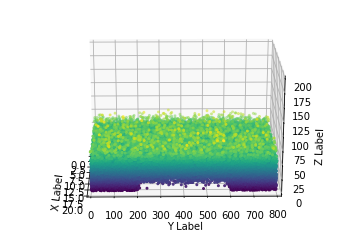

In [135]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility

f=files_t[5]
print(f)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arr= np.loadtxt(f,delimiter=", ").astype(int)

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

    

    
ax.scatter(xs=arr[:,0],ys=arr[:,1],zs=arr[:,2],s=4,c = arr[:,2])
    
    
    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(20, angle)
ax.set_xlim([0,20])
ax.set_ylim([0,802])
ax.set_zlim([0,200])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
#plt.savefig('gifs/final' + str())
len(arr[:,1])

In [137]:
np.max(arr[:,2])

85

3D_eden_cpp/CPD/prof_T480_2020-09-18-17-10-51.txt
2599
3D_eden_cpp/CPD/prof_T360_2020-09-18-17-10-51.txt


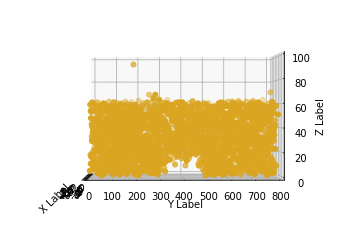

In [109]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility


f=files_t[12]
print(f)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
arr= np.loadtxt(f,delimiter=", ").astype(int)

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

    

    
ax.scatter(xs=arr[:,0],ys=arr[:,1],zs=arr[:,2],c='goldenrod',s=25)
    
    

ax.view_init(0, angle)
print(len(arr[:,1]))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
print(files_t[9])
ax.set_xlim([0,20])
ax.set_ylim([0,802])
ax.set_zlim([0,100])
timestr = time.strftime("%Y_%m_%d-%H_%M_%S")
#plt.savefig('gifs/final' + str())

In [154]:
timestr = files_t[0].split("prof_T")[1].split("_")[1].split(".")[0]

In [108]:
len(arr[:,1])

2599

In [113]:
arr[:,1]

array([  1,   1,   1, ..., 799, 799, 799])